COMPARING SOME FUNDAMENTAL REGRESSION METHODS ON ADMISSION PREDICTION DATA AND DEPLOYING ML MODEL TO IBM CLOUD

There are lots of regression methods to predict data such as Linear Regression, Decision Tree Regression and so on. In this notebook, we will try to predict the "Chance of Admit" data by using some of fundamental regression methods, which are Linear Regression, Multiple Linear Regression, Decision Tree Regression and Random Forest Regression.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='OnXOxYJpFaS7YsiRvshtwtPLtBm60B0_lUknUsVZKqqN',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'universityeligibilitypredictor-donotdelete-pr-xiux87vd9z54fy'
object_key = 'Admission_Predict.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data= pd.read_csv(body)
data.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [4]:
corr_matrix = data.corr()
corr_matrix

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


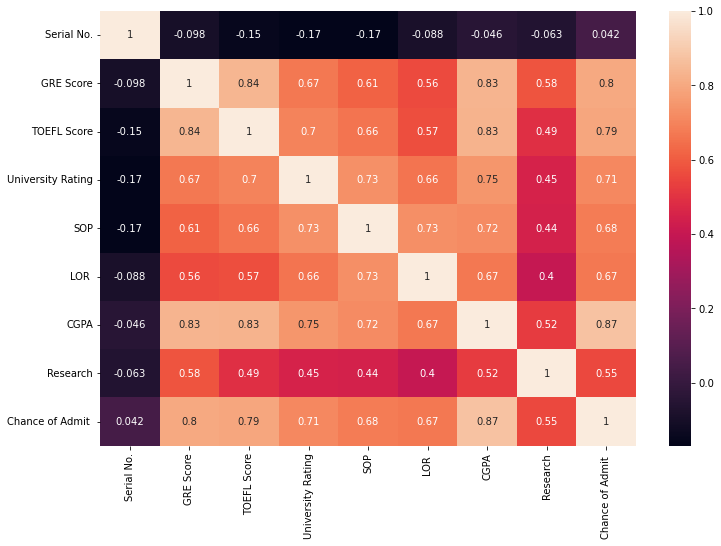

In [5]:
#plotting the correlation matrix as a heatmap

fig = plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

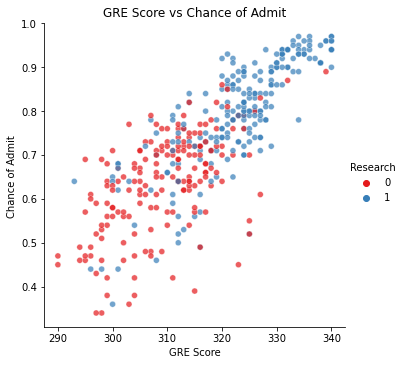

In [6]:
#plotting data which have high correlation

sns.relplot(data=data,x="GRE Score",y="Chance of Admit ",hue="Research",
            palette="Set1",alpha=0.7)
plt.title("GRE Score vs Chance of Admit")
plt.show()

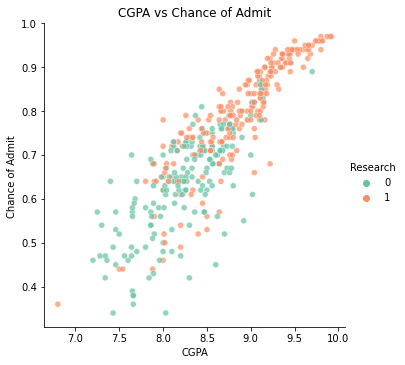

In [7]:
sns.relplot(data=data,x="CGPA",y="Chance of Admit ",hue="Research",
            palette="Set2",alpha=0.7)
plt.title("CGPA vs Chance of Admit")
plt.show()

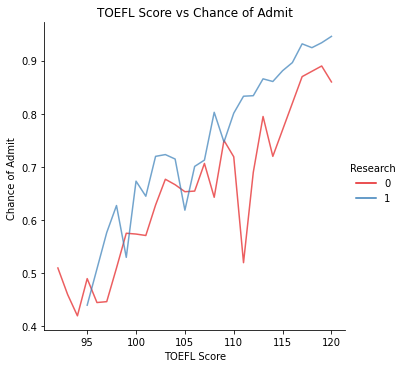

In [8]:
sns.relplot(data=data,x="TOEFL Score",y="Chance of Admit ",hue="Research",
            palette="Set1",alpha=0.7,kind="line",ci=None)
plt.title("TOEFL Score vs Chance of Admit")
plt.show()

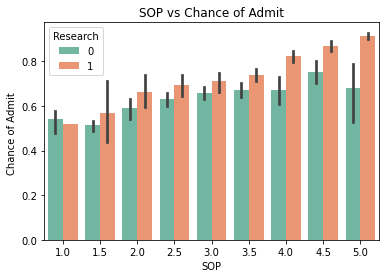

In [9]:
sns.barplot(data=data,x="SOP",y="Chance of Admit ",
            palette="Set2",hue="Research")
plt.title("SOP vs Chance of Admit")
plt.show()

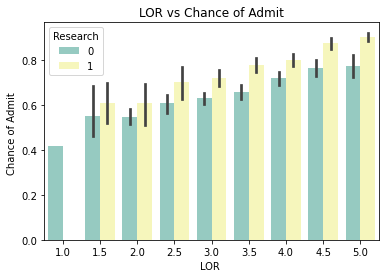

In [10]:
sns.barplot(data=data,x="LOR ",y="Chance of Admit ",
            palette="Set3",hue="Research")
plt.title("LOR vs Chance of Admit")
plt.show()

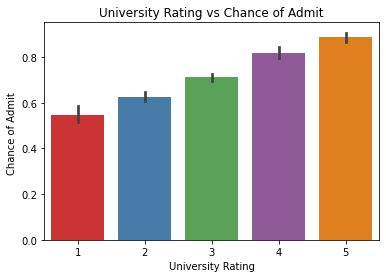

In [11]:
sns.barplot(data=data,x="University Rating",y="Chance of Admit ",
            palette="Set1")
plt.title("University Rating vs Chance of Admit")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [13]:
x = data[["GRE Score","TOEFL Score","University Rating","SOP","LOR ","CGPA", "Research"]]
y = data["Chance of Admit "].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
#implying multiple linear regression and determining its score

multiple_lin_reg = LinearRegression()
multiple_lin_reg.fit(x_train,y_train)

y_pred_mlr = multiple_lin_reg.predict(x_test)

r2_score_mlr = r2_score(y_test,y_pred_mlr)
print("Mutiple Linear Regression's Score = {:.3f}".format(r2_score_mlr))

Mutiple Linear Regression's Score = 0.821


In [15]:
#implying decision tree regression and determining its score

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

y_pred_tree = tree_reg.predict(x_test)

r2_score_tree = r2_score(y_test,y_pred_tree)
print("Decision Tree Regression's Score = {:.3f}".format(r2_score_tree))

Decision Tree Regression's Score = 0.679


In [16]:
#implying random forest regression and determining its score

ran_for_reg = RandomForestRegressor(n_estimators=100,random_state=42)
ran_for_reg.fit(x_train,y_train)

y_pred_rfr = ran_for_reg.predict(x_test)

r2_score_rfr = r2_score(y_test,y_pred_rfr)
print("Random Forest Regression's Score = {:.3f}".format(r2_score_rfr))

Random Forest Regression's Score = 0.807


In [17]:
#!pip install ibm_watson_machine_learning

In [18]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "8cqf_Qc-PZbuOGpinZfs1SrsP-JbjMjye2X9oY4X-63H"
}

client = APIClient(wml_credentials)

In [19]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [20]:
space_uid = guid_from_space_name(client, 'newspace')
print("Space UID = " + space_uid)

Space UID = cba7fbed-e01c-417f-b926-3d8732b32228


In [21]:
client.set.default_space(space_uid)

'SUCCESS'

In [22]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [23]:
#Set Python Version
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [24]:
model_details = client.repository.store_model(model = multiple_lin_reg, meta_props={
    client.repository.ModelMetaNames.NAME: "UAEP_Multiple_Linear_Regression",
    client.repository.ModelMetaNames.TYPE: "scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}
)

model_id = client.repository.get_model_id(model_details)

In [25]:
model_id

'a847601e-0bf8-404a-ac84-7e8428725ae8'

In [26]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [37]:
import requests

# NOTE: you must manually set API_KEY below using information retrieved from your IBM Cloud account.
API_KEY = "8cqf_Qc-PZbuOGpinZfs1SrsP-JbjMjye2X9oY4X-63H"
token_response = requests.post('https://iam.cloud.ibm.com/identity/token', data={"apikey":
 API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})
mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# NOTE: manually define and pass the array(s) of values to be scored in the next line
payload_scoring = {"input_data": [{"field": [["GRE Score","TOEFL Score","University Rating","SOP","LOR ","CGPA", "Research"]], "values": [[326, 110, 2, 3.5, 4, 9.23, 1]]}]}

response_scoring = requests.post('https://us-south.ml.cloud.ibm.com/ml/v4/deployments/35d1a0c8-7921-4798-bef9-c20ebffd3b9d/predictions?version=2022-11-17', json=payload_scoring,
 headers={'Authorization': 'Bearer ' + mltoken})
print("Scoring response")

pred = response_scoring.json()
print(pred)


Scoring response
{'predictions': [{'fields': ['prediction'], 'values': [[[0.8339846446531018]]]}]}


In [30]:
probability = response_scoring.json()['predictions'][0]['values'][0][0][0]
probability

0.8339846446531018